<a href="https://colab.research.google.com/github/poojasrini/Mini_project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMAGE CLASSIFICATION USING MACHINE LEARNING** 
-- K NEAREST NEIGHBOR ALGORITHM




Image classification is the process of categorizing and labeling groups of pixels or vectors within an image based on specific rules. It is a complex process that may be affected by many factors. Classification results are the basis for many environmental and socioeconomic applications ranging from medicine to tavel and even day to day activities, hence, correct classification with good accuracy is very important.

In this project **KNN algorithm** is used for the classification of images of flowers, 4 different types of flowers are considered for this project:
1. Rose
2. Sunflower
3. Daisy
4. Marigold





# **Steps involved in image classification:**

## **1) Gathering of data**
50 images of each flower type are downloaded and stored
- bing downloader is used 

In [ ]:
# !pip install bing-image-downloader
# import bing_image_downloader
# cd /content/drive/My Drive
# from bing_image_downloader import downloader
# downloader.download('rose flower', limit=50,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)


The above code is used to download the rose flower images. Similarly other 3 flower types are also downloaded. 

## **2) Pre-processing of data**

In [ ]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os


In [ ]:
target = []
images = []   # In matrix format
flat_data = []  # In vector format

datadir = '/content/drive/My Drive/images'
categories = ['rose flower','sunflower flower','marigold flower','daisy flower']

for category in categories:
  class_index=categories.index(category)
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_matrix=imread(os.path.join(path,img))
    img_resized=resize(img_matrix,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(category)


In [ ]:
import pandas as pd
df=pd.DataFrame(flat_data)
df['Target']=target

In [ ]:
# Final dataframe after pre-processing
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.203922,0.211111,0.149020,0.212627,0.227451,0.145098,0.223529,0.248497,0.149020,0.233386,0.270588,0.152941,0.243137,0.286275,0.158985,0.253574,0.297281,0.168627,0.262562,0.305882,0.176471,0.266667,0.309804,0.183608,0.266667,0.309804,0.184314,0.262745,0.305882,0.180392,0.254902,0.298039,0.176471,0.247059,0.286275,0.172549,0.235294,0.278431,0.160902,0.227451,...,0.379033,0.449621,0.258824,0.353647,0.423529,0.258824,0.353647,0.423529,0.259205,0.345098,0.415686,0.250980,0.317647,0.385281,0.228418,0.274902,0.337647,0.196078,0.227268,0.278248,0.156680,0.175712,0.214928,0.116889,0.128078,0.155529,0.078431,0.098039,0.115739,0.049072,0.094118,0.105882,0.039216,0.097176,0.109804,0.035294,0.098039,0.117359,0.035294,rose flower
1,0.524183,0.525490,0.179085,0.421569,0.454902,0.100000,0.288235,0.335294,0.028758,0.162418,0.211438,0.009477,0.126471,0.150980,0.032353,0.171569,0.189216,0.033007,0.213399,0.213725,0.031373,0.190196,0.196078,0.027451,0.183333,0.190850,0.025490,0.248039,0.242157,0.031046,0.257843,0.275490,0.021569,0.250980,0.276144,0.005556,0.233660,0.253268,0.000000,0.217647,...,0.704575,0.709804,0.329739,0.719608,0.723529,0.362418,0.670588,0.671569,0.314706,0.402614,0.390850,0.087255,0.208497,0.194771,0.008497,0.197059,0.189216,0.004902,0.301307,0.313072,0.058824,0.527124,0.509804,0.211765,0.586275,0.562745,0.272549,0.608497,0.597059,0.304902,0.633660,0.625817,0.331699,0.615686,0.597059,0.313725,0.615686,0.603922,0.335621,rose flower
2,0.468627,0.502614,0.133333,0.491176,0.510784,0.162745,0.554902,0.570261,0.257516,0.816993,0.811111,0.580065,0.950000,0.947059,0.857843,0.970915,0.972549,0.943791,0.984314,0.984314,0.956863,0.950980,0.949020,0.792157,0.917647,0.909477,0.660131,0.660131,0.669608,0.349020,0.560784,0.615686,0.252941,0.349673,0.389542,0.074510,0.414706,0.370588,0.070588,0.278431,...,0.094118,0.109804,0.047059,0.096078,0.106209,0.052614,0.090196,0.101961,0.058824,0.082353,0.098039,0.050980,0.084314,0.098039,0.047059,0.082353,0.094118,0.052941,0.082353,0.094118,0.050980,0.082680,0.094118,0.052614,0.080392,0.098039,0.058824,0.086275,0.098039,0.050980,0.086275,0.094118,0.050980,0.086275,0.098039,0.050980,0.094118,0.109804,0.049020,rose flower
3,0.252078,0.149020,0.141176,0.243817,0.179686,0.145778,0.182859,0.207843,0.100523,0.157203,0.188575,0.086275,0.078745,0.104066,0.029569,0.043137,0.074510,0.000000,0.067071,0.096276,0.017845,0.279948,0.216052,0.212865,0.372523,0.213167,0.270614,0.319268,0.187477,0.218092,0.097176,0.088333,0.054032,0.031373,0.050980,0.003922,0.023529,0.047059,0.003922,0.015686,...,0.765359,0.788214,0.565987,0.810641,0.822405,0.653752,0.850961,0.852000,0.714745,0.878431,0.877652,0.756083,0.901961,0.898022,0.788218,0.905882,0.901961,0.800000,0.901961,0.894118,0.796078,0.898039,0.894118,0.788235,0.898039,0.890196,0.784314,0.898039,0.890196,0.788235,0.898039,0.890196,0.792157,0.898039,0.890196,0.792157,0.898039,0.890196,0.792157,rose flower
4,0.996078,0.996078,0.996078,0.969216,0.949412,0.953333,0.929412,0.879412,0.887255,0.929412,0.874510,0.884314,0.929412,0.874902,0.886275,0.931373,0.878431,0.888235,0.933333,0.878431,0.888235,0.935294,0.878431,0.890196,0.935294,0.878431,0.890196,0.935294,0.878431,0.892157,0.939216,0.878431,0.894118,0.939216,0.878431,0.894118,0.939216,0.878431,0.894118,0.939216,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,rose flower

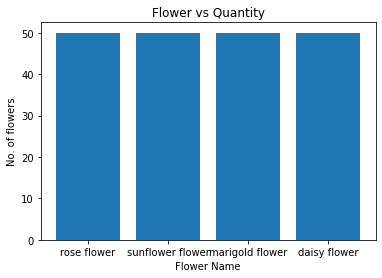

In [ ]:
# Display of the number of images of each flower type
plt.bar(categories,df['Target'].value_counts())
plt.title('Flower vs Quantity')
plt.xlabel('Flower Name')
plt.ylabel('No. of flowers')
plt.show()


In [ ]:
# Input and Output 
x=df.iloc[:,0:67500].values
y=df.iloc[:,67500].values

## **3) Classification of images using KNN Classification Algorithm**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
k=np.arange(1,160)
param={'n_neighbors':k}
model=KNeighborsClassifier()
model_grid=GridSearchCV(model,param)
model_grid.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  3...
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 

In [ ]:
# Best K nearest neighbor
model_grid.best_params_

{'n_neighbors': 16}

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = KNeighborsClassifier(n_neighbors=16,metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [ ]:
# Predicted output
y_pred = model.predict(x_test)
y_pred

array(['rose flower', 'daisy flower', 'marigold flower',
       'sunflower flower', 'daisy flower', 'rose flower', 'rose flower',
       'marigold flower', 'rose flower', 'daisy flower',
       'sunflower flower', 'marigold flower', 'sunflower flower',
       'marigold flower', 'sunflower flower', 'rose flower',
       'rose flower', 'marigold flower', 'rose flower',
       'sunflower flower', 'daisy flower', 'marigold flower',
       'daisy flower', 'daisy flower', 'daisy flower', 'marigold flower',
       'daisy flower', 'daisy flower', 'marigold flower', 'rose flower',
       'rose flower', 'sunflower flower', 'daisy flower',
       'marigold flower', 'rose flower', 'daisy flower',
       'marigold flower', 'rose flower', 'sunflower flower',
       'marigold flower', 'marigold flower', 'sunflower flower',
       'rose flower', 'marigold flower', 'daisy flower',
       'sunflower flower', 'sunflower flower', 'marigold flower',
       'marigold flower', 'marigold flower'], dtype=objec

In [ ]:
# Actual output
y_test

array(['rose flower', 'daisy flower', 'marigold flower',
       'sunflower flower', 'daisy flower', 'daisy flower', 'rose flower',
       'marigold flower', 'rose flower', 'daisy flower',
       'sunflower flower', 'marigold flower', 'daisy flower',
       'daisy flower', 'sunflower flower', 'rose flower', 'rose flower',
       'marigold flower', 'rose flower', 'sunflower flower',
       'daisy flower', 'marigold flower', 'rose flower', 'daisy flower',
       'sunflower flower', 'marigold flower', 'daisy flower',
       'daisy flower', 'marigold flower', 'rose flower', 'rose flower',
       'sunflower flower', 'daisy flower', 'marigold flower',
       'rose flower', 'daisy flower', 'marigold flower', 'rose flower',
       'sunflower flower', 'marigold flower', 'marigold flower',
       'sunflower flower', 'rose flower', 'marigold flower',
       'daisy flower', 'sunflower flower', 'rose flower',
       'sunflower flower', 'marigold flower', 'marigold flower'],
      dtype=object)

In [ ]:
# Evaluation of the model
from sklearn.metrics import accuracy_score
print("The accuracy of the model is ",accuracy_score(y_pred,y_test)*100,"%")

The accuracy of the model is  86.0 %


## **4) Confusion matrix and Classification report**

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[10,  0,  1,  1],
       [ 1, 14,  0,  1],
       [ 1,  0, 11,  0],
       [ 1,  0,  1,  8]])

In [ ]:
# Classification report
from sklearn import metrics
metrics.classification_report(y_test,y_pred)

'                  precision    recall  f1-score   support\n\n    daisy flower       0.83      0.77      0.80        13\n marigold flower       0.88      1.00      0.93        14\n     rose flower       0.92      0.85      0.88        13\nsunflower flower       0.80      0.80      0.80        10\n\n        accuracy                           0.86        50\n       macro avg       0.86      0.85      0.85        50\n    weighted avg       0.86      0.86      0.86        50\n'

## **5) Prediction for new image**

**IMAGE 1** 

In [ ]:
# Resizing and flattening new image 1
img1=imread('/content/drive/My Drive/images/New prediction images/plantsguru-flowering-plants-rose-red-800x800.jpg')
img1_resize = resize(img1,(150,150,3))
img1_flatten = img1_resize.flatten()


In [ ]:
img1_pred = model.predict([img1_flatten])
img1_pred

array(['rose flower'], dtype=object)

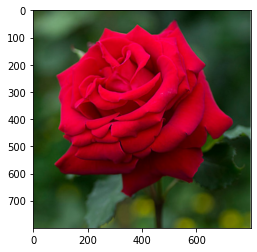

In [ ]:
plt.imshow(img1)

From the above displayed image we can see that the predicted type of flower(rose) and the flower(rose) in the image are same

**IMAGE 2**

In [ ]:

# Resizing and flattening new image 2
img2=imread('/content/drive/My Drive/images/New prediction images/sunflower-1627193_1920.jpg')
img2_resize = resize(img2,(150,150,3))
img2_flatten = img2_resize.flatten()

In [ ]:
img2_pred = model.predict([img2_flatten])
img2_pred

array(['sunflower flower'], dtype=object)

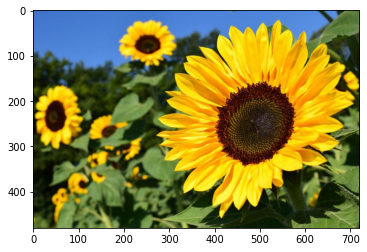

In [ ]:
plt.imshow(img2)

From the above displayed image we can see that the predicted type of flower(sunflower) and the flower(sunflower) in the image are same

**IMAGE 3**

In [ ]:
# Resizing and flattening new image 3
img3=imread('/content/drive/My Drive/images/New prediction images/daisy-flower-1532449822.jpg')
img3_resize = resize(img3,(150,150,3))
img3_flatten = img3_resize.flatten()

In [ ]:
img3_pred = model.predict([img3_flatten])
img3_pred

array(['daisy flower'], dtype=object)

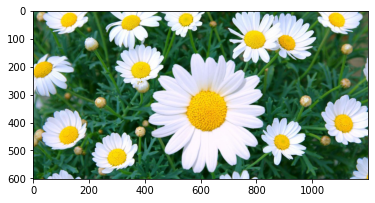

In [ ]:
plt.imshow(img3)

From the above displayed image we can see that the predicted type of flower(daisy) and the flower(daisy) in the image are same

**IMAGE 4**

In [ ]:
# Resizing and flattening new image 4
img4=imread('/content/drive/My Drive/images/New prediction images/Marigold_Garland_Orange_1024x.jpg')
img4_resize = resize(img4,(150,150,3))
img4_flatten = img4_resize.flatten()

In [ ]:
img4_pred = model.predict([img4_flatten])
img4_pred

array(['marigold flower'], dtype=object)

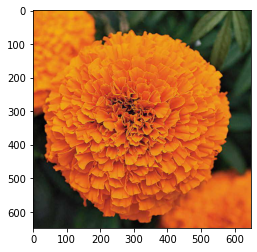

In [ ]:
plt.imshow(img4)

From the above displayed image we can see that the predicted type of flower(marigold) and the flower(marigold) in the image are same

## **Conclusion**

From this project it is seen that the accuracy of the model is 86% and the new images were predicted correctly for all types of flower images. Hence KNN algorithm is a good supervised classification algorithm that can be used.